<a href="https://colab.research.google.com/github/MiguelArias1/Exercises-SyS-Miguel-Angel-Arias-Ocampo-2/blob/main/Parcial2/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PUNTO 2.1**
Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|6\sin(3t+\pi/4)|^2$, con $t\in [-\pi, \pi]$.


wo= 1.0
Fo= 1.5707963267948966


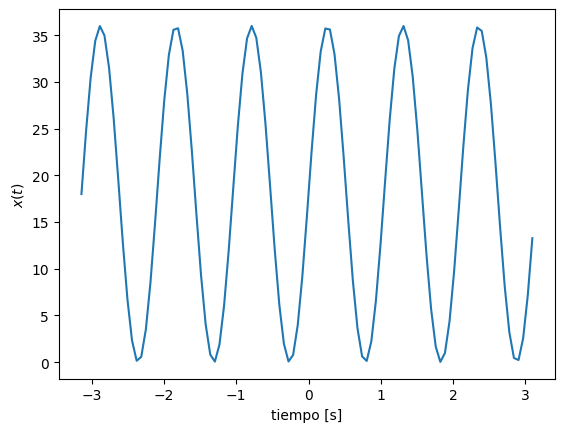

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(6*np.sin(3*tv+(np.pi/4)))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

In [83]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

# graficar bases
def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

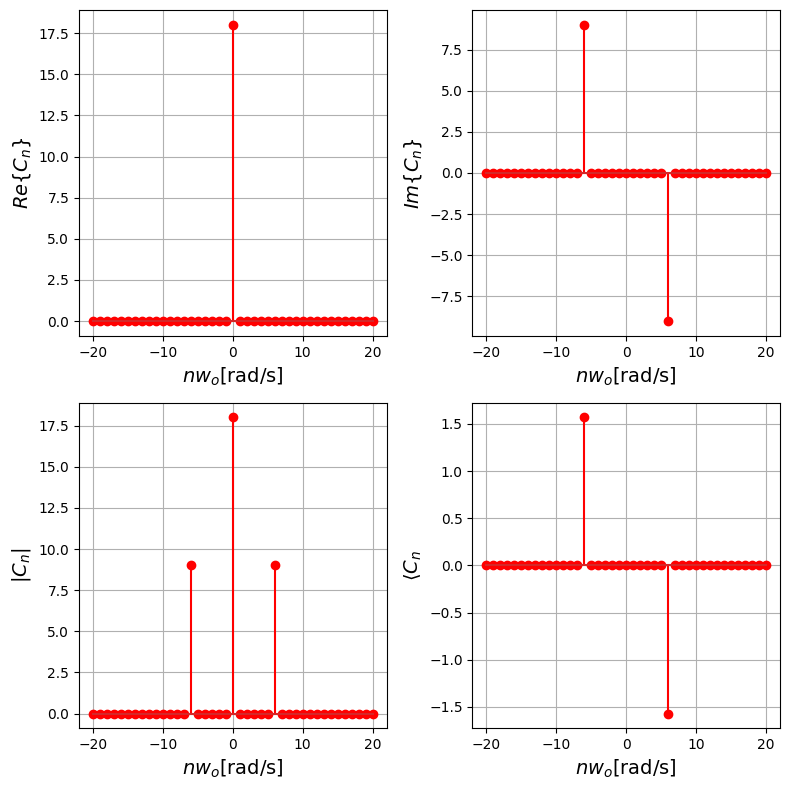

In [84]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 18 # nivel dc C_0
cn[N-6] = 9j #armónico -6
cn[N+6] = -9j #armónico +6

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r') #Grafica la parte real del espectro

plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r') #grafica la parte imaginaria del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()
plt.show()

In [85]:
Px = 486 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='$x(t)$') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))
plt.show()

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

**Punto 2.2**

In [86]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (139 kB)
  Using cached idna-3.4-py3-none-a

In [87]:
#simulación con canción de youtube
#instalar api youtube-dl
import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [88]:
#descargar canción de mi interés
link_= ["https://www.youtube.com/watch?v=ASKEeKG5Ll4"]
name_ = ['eminem']
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

eminem
[youtube] Extracting URL: https://www.youtube.com/watch?v=ASKEeKG5Ll4
[youtube] ASKEeKG5Ll4: Downloading webpage
[youtube] ASKEeKG5Ll4: Downloading ios player API JSON
[youtube] ASKEeKG5Ll4: Downloading android player API JSON
[youtube] ASKEeKG5Ll4: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=ASKEeKG5Ll4
[youtube] ASKEeKG5Ll4: Downloading webpage
[youtube] ASKEeKG5Ll4: Downloading ios player API JSON
[youtube] ASKEeKG5Ll4: Downloading android player API JSON
[youtube] ASKEeKG5Ll4: Downloading m3u8 information
[info] ASKEeKG5Ll4: Downloading 1 format(s): 251
[download] eminem.mp3 has already been downloaded
[download] 100% of    4.16MiB
Download complete... eminem.mp3


In [89]:
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])

In [90]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [91]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

Frecuencia de muestreo 48000.00[Hz]
audio eminem.wav


In [92]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal


In [93]:
Audio(m,rate=fs)

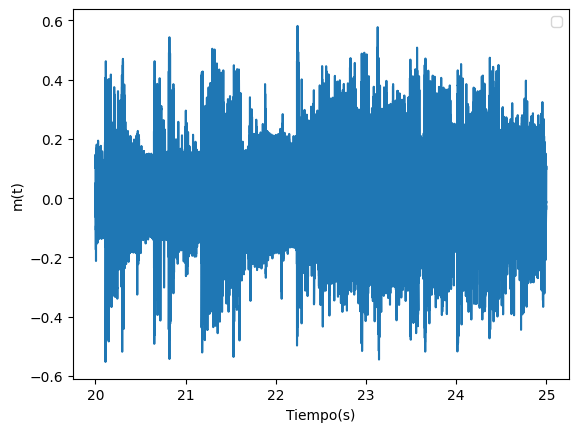

[20.         20.00002083 20.00004167 ... 24.9999375  24.99995833
 24.99997917]
[0.10235596 0.10839844 0.10775757 ... 0.10134888 0.10040283 0.09902954]
0.5810546875


In [94]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('Tiempo(s)')
plt.ylabel('m(t)')
plt.legend()
plt.show()
print(tt)
print(m)
max = np.max(m)
print(max)

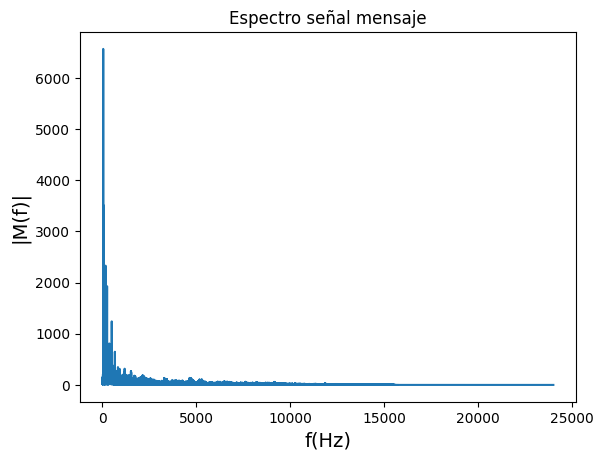

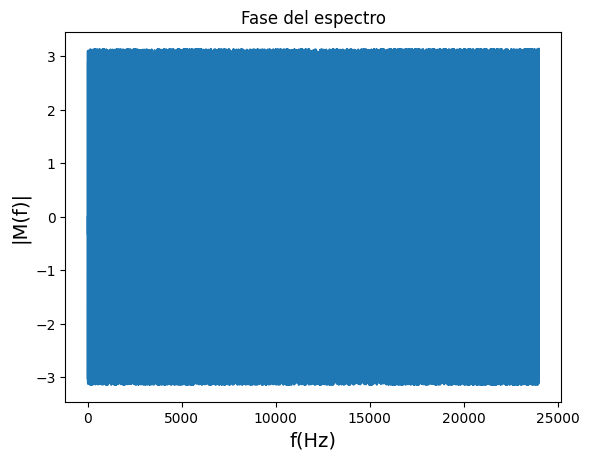

In [95]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'f(Hz)',fontsize = 14)
plt.ylabel(r'|M(f)|',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.title(r'Fase del espectro')
plt.xlabel(r'f(Hz)',fontsize = 14)
plt.ylabel(r'|M(f)|',fontsize = 14)
plt.show()

In [96]:
Fc = 15000 #frecuencia portadora
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = np.max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora
print(Ac)


0.5810546875


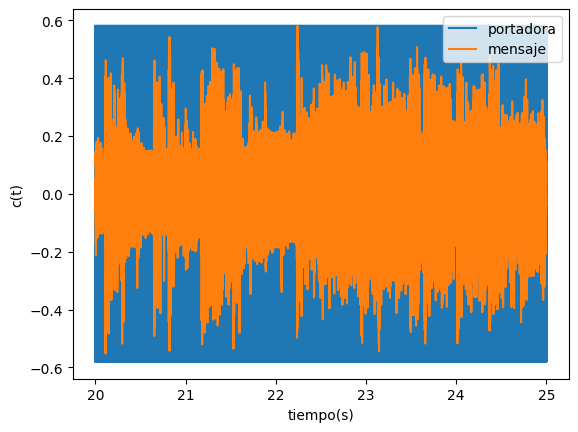

In [97]:
plt.plot(tt,c,label='portadora')
plt.plot(tt,m,label='mensaje')
plt.xlabel('tiempo(s)')
plt.ylabel('c(t)')
plt.legend()
plt.show()


In [98]:
#repoducir portadora
Audio(c,rate=fs)

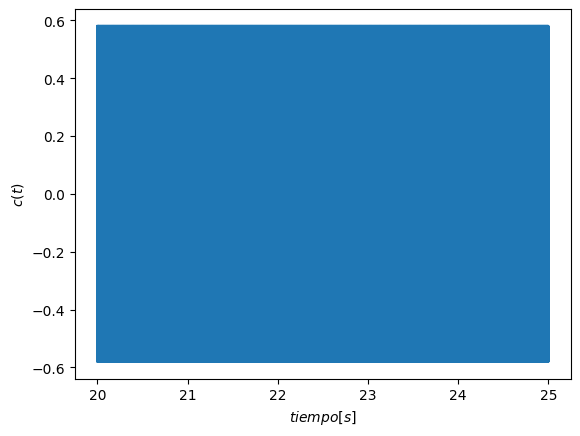

In [99]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

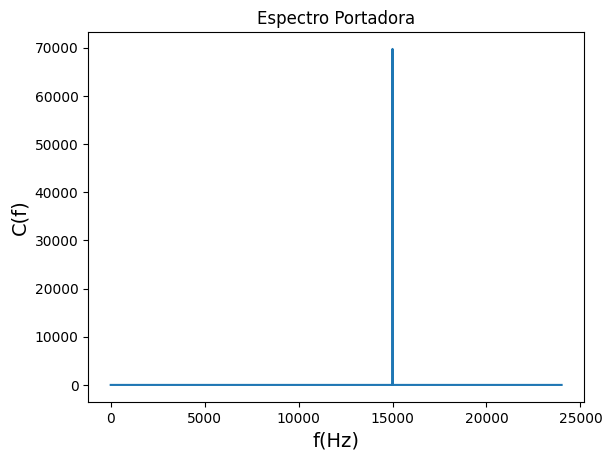

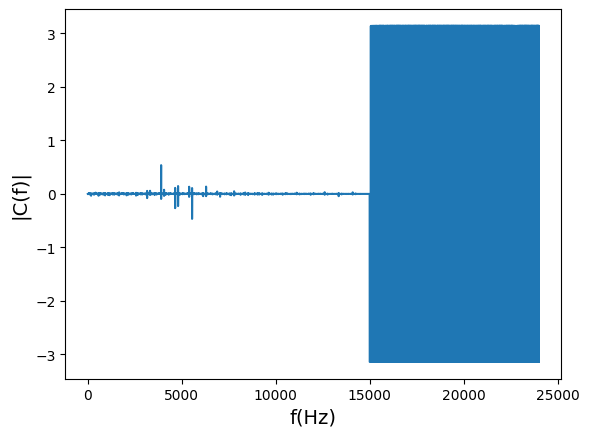

In [100]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'f(Hz)',fontsize = 14)
plt.ylabel(r'C(f)',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'f(Hz)',fontsize = 14)
plt.ylabel(r'|C(f)|',fontsize = 14)
plt.show()


In [101]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

#repoducir modulada
Audio(y,rate=fs)

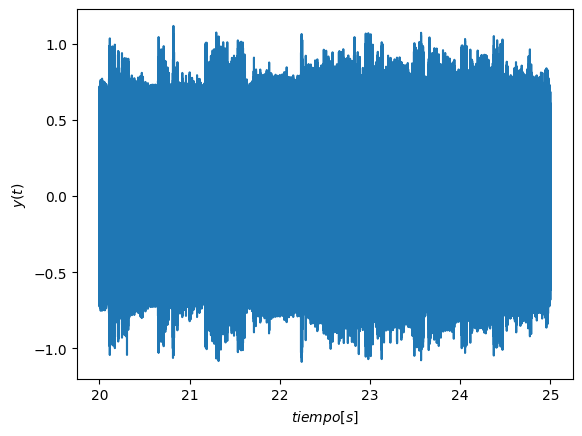

In [102]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

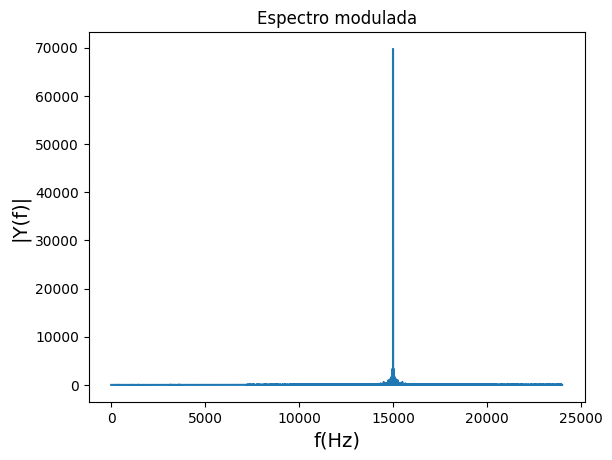

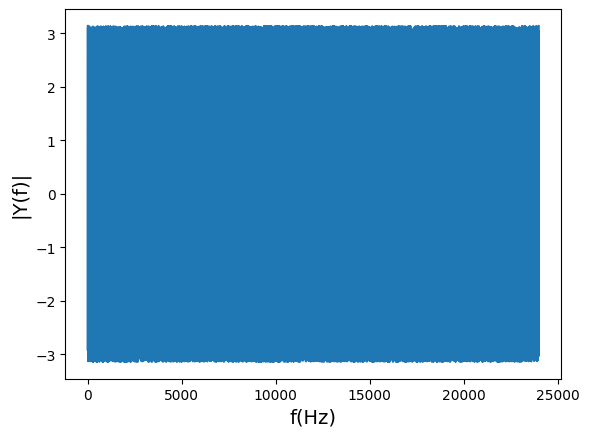

In [103]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'f(Hz)',fontsize = 14)
plt.ylabel(r'|Y(f)|',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'f(Hz)',fontsize = 14)
plt.ylabel(r'|Y(f)|',fontsize = 14)
plt.show()

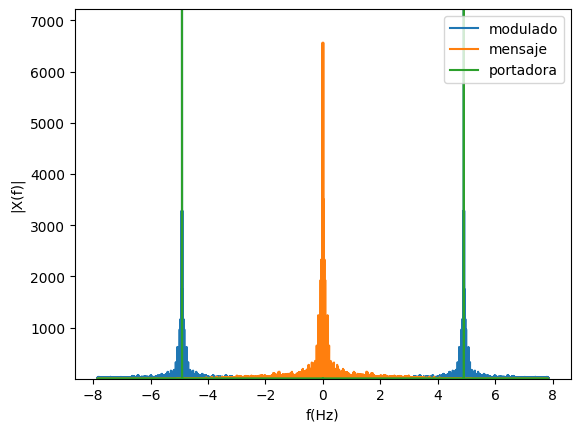

In [104]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('f(Hz)')
plt.ylabel('|X(f)|')
plt.ylim([np.min(abs(Xfm)), 1.1*np.max(abs(Xfm))])
plt.show()

**Punto 2.3**

In [105]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-10-28 01:08:01--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 173.194.202.102, 173.194.202.113, 173.194.202.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l8qv1g9hgck3bs07t9b12j67mht1vlnp/1698455250000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=008b11e8-88b1-4537-9e72-06162c95a15d [following]
--2023-10-28 01:08:01--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l8qv1g9hgck3bs07t9b12j67mht1vlnp/1698455250000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=008b11e8-88b1-4537-9e72-06162c95a15d
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 142.250.107.

In [106]:
#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)
# Mostrar las claves disponibles en el diccionario
import scipy.io as sio

# Cargar los datos desde el archivo .mat
path_ = 'CaractCE.mat'
dicX = sio.loadmat(path_)

# Iterar a través de todas las claves y mostrarlas una por una
for key in dicX:
    print(key)

# Iterar a través de las claves en el diccionario y mostrar los datos asociados a cada clave
for key, value in dicX.items():
    print(f'Base de datos: {key}')
    print(value)
    print('\n')

__header__
__version__
__globals__
CE
E
F
Base de datos: __header__
b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jul 21 06:26:43 2018'


Base de datos: __version__
1.0


Base de datos: __globals__
[]


Base de datos: CE
[[-2.82991778e+03 -5.05738346e+03  3.20558619e+03 ...  6.38080957e+00
   7.68604627e+00  8.17023104e+00]
 [-2.86869478e+03 -5.00993965e+03  3.19676653e+03 ...  6.40760702e+00
   7.69964487e+00  8.17002744e+00]
 [-2.95145599e+03 -5.13354811e+03  3.18277814e+03 ...  6.39972309e+00
   7.71905087e+00  8.17839470e+00]
 ...
 [-9.45334754e+03 -1.30512052e+04  1.93672415e+03 ...  6.42458072e+00
   7.72999447e+00  8.17061531e+00]
 [-8.43847687e+03 -1.18579421e+04  2.10372911e+03 ...  6.36443646e+00
   7.65425929e+00  8.13380289e+00]
 [-8.84877618e+03 -1.15516835e+04  2.08918848e+03 ...  6.40814893e+00
   7.71778834e+00  8.17584808e+00]]


Base de datos: E
[[ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 ...
 [ 1  3 10]
 [ 1  3 10]
 [ 1  3 10]]


Base de datos: F
[[ 0.01460308  

In [107]:
Xt = dicX['F']
print(Xt.shape)

(1200, 4000)


In [108]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [109]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [110]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, _ = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000) 


In [111]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

(840, 2001)

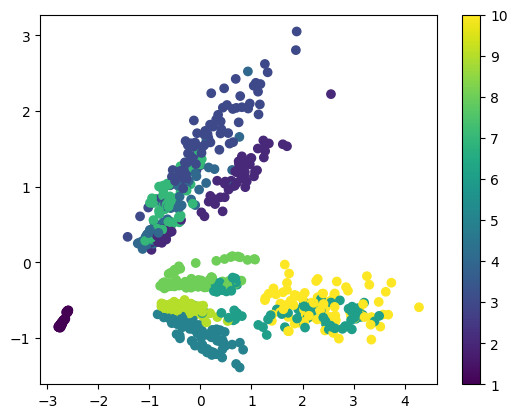

In [112]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T

#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

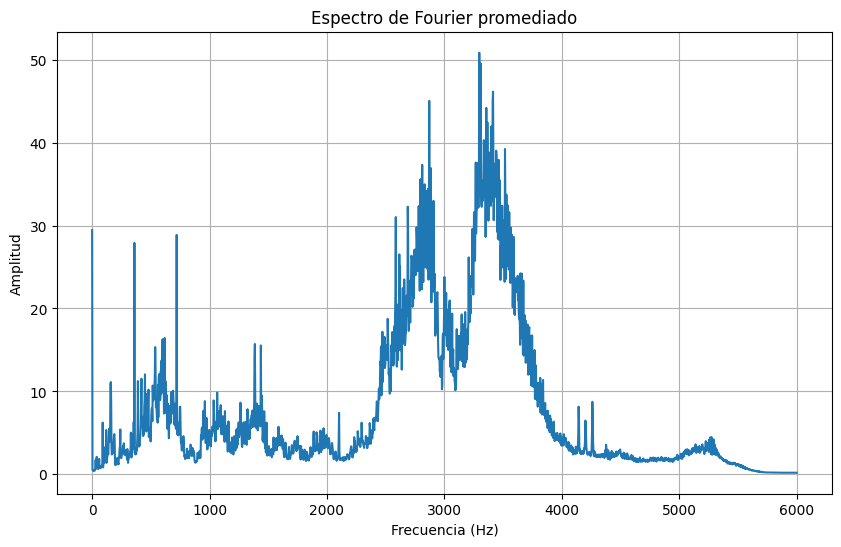

In [113]:
# Supongamos que quieres promediar las filas de Xw para obtener un espectro promedio
spectrum = np.mean(Xw, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(vf, spectrum)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Fourier promediado')
plt.grid(True)
plt.show()

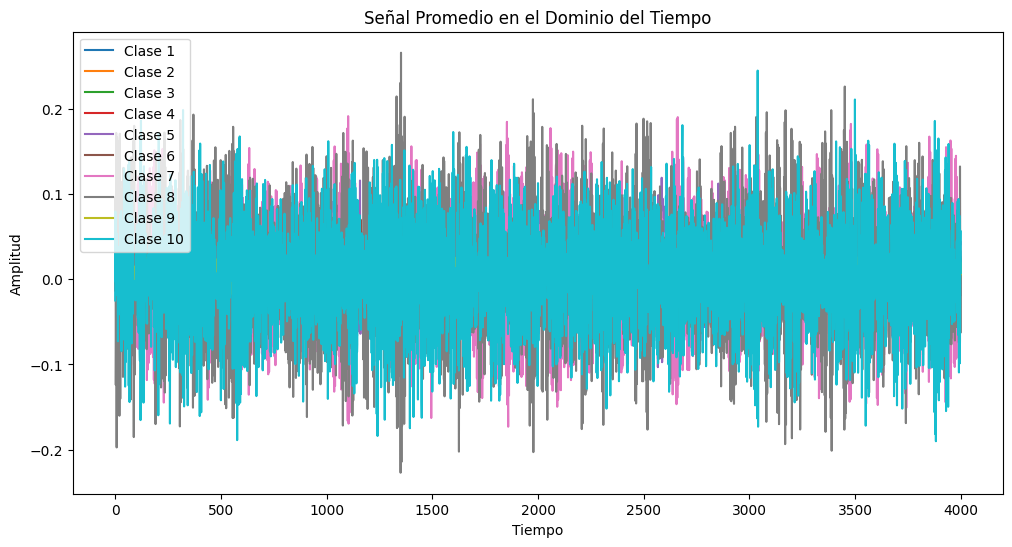

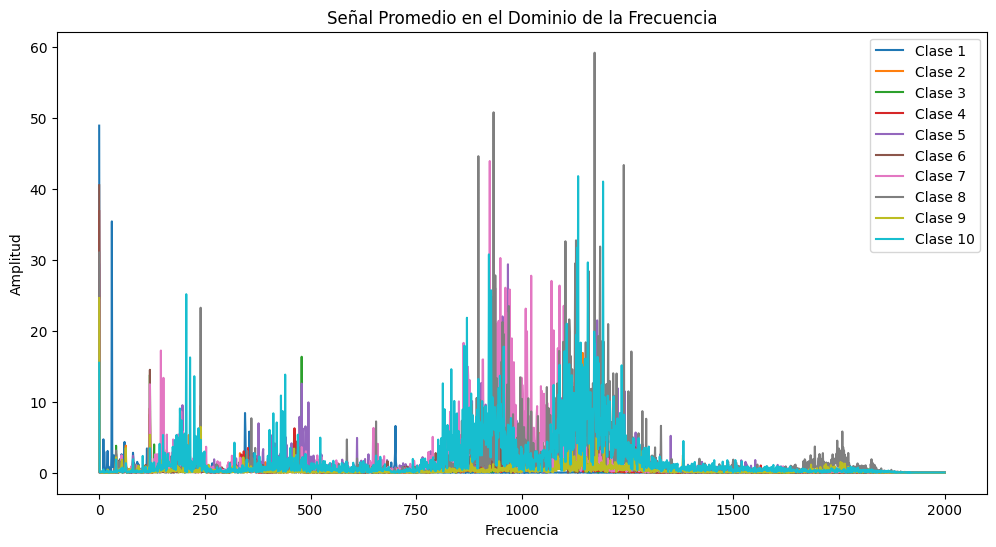

In [114]:
# Función para calcular la señal promedio para cada clase
def calcular_señal_promedio(X, Y):
    clases = np.unique(Y)
    señales_promedio_tiempo = []
    señales_promedio_frecuencia = []

    for clase in clases:
        # Seleccionar las muestras de la clase actual
        muestras_clase = X[Y == clase]
        # Calcular la señal promedio en el dominio del tiempo
        señal_promedio_tiempo = np.mean(muestras_clase, axis=0)
        señales_promedio_tiempo.append(señal_promedio_tiempo)
        # Calcular la FFT de la señal promedio
        señal_promedio_fft = np.abs(np.fft.rfft(señal_promedio_tiempo))
        señales_promedio_frecuencia.append(señal_promedio_fft)

    return clases, señales_promedio_tiempo, señales_promedio_frecuencia

clases, señales_promedio_tiempo, señales_promedio_frecuencia = calcular_señal_promedio(Xtrain, Ytrain)

# Graficar señales promedio en el dominio del tiempo
plt.figure(figsize=(12, 6))
for i, clase in enumerate(clases):
    plt.plot(señales_promedio_tiempo[i], label=f'Clase {clase}')

plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Promedio en el Dominio del Tiempo')
plt.legend()
plt.show()

# Graficar señales promedio en el dominio de la frecuencia
plt.figure(figsize=(12, 6))
for i, clase in enumerate(clases):
    plt.plot(señales_promedio_frecuencia[i], label=f'Clase {clase}')

plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Señal Promedio en el Dominio de la Frecuencia')
plt.legend()
plt.show()

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Entrenar un clasificador SVM
clf = SVC(kernel='linear')
clf.fit(Xtrain, Ytrain)

# Realizar predicciones en el conjunto de prueba (Xtest)
Ypred = clf.predict(Xtest)

# Calcular la precisión de las predicciones
accuracy = accuracy_score( _ , Ypred)
print(f"Precisión del detector de fallos: {accuracy * 100:.2f}%")

Precisión del detector de fallos: 26.39%


In [116]:
# Realizar predicciones en el conjunto de prueba (Xtest)
Ypred = clf.predict(Xtest)

# Mapeo de etiquetas a nombres de clases
etiquetas_clases = ['NOR', 'IR1_0.007', 'IR1_0.014', 'IR1_0.021', 'IR2_0.007', 'IR2_0.014', 'IR2_0.021', 'BE_0.007', 'BE_0.014', 'BE_0.021']

# Mostrar los tipos de fallos detectados en Xtest
print("Tipos de fallos detectados en Xtest:")
for i in range(len(Ypred)):
    if Ypred[i] >= 0 and Ypred[i] < len(etiquetas_clases):
        clase_predicha = etiquetas_clases[Ypred[i]]
        print(f"Muestra {i + 1}: {clase_predicha}")
    else:
        print(f"Muestra {i + 1}: Clase fuera de rango")

Tipos de fallos detectados en Xtest:
Muestra 1: IR2_0.007
Muestra 2: IR2_0.021
Muestra 3: IR1_0.007
Muestra 4: IR2_0.007
Muestra 5: IR2_0.007
Muestra 6: IR1_0.021
Muestra 7: IR1_0.007
Muestra 8: IR2_0.021
Muestra 9: BE_0.021
Muestra 10: IR1_0.014
Muestra 11: IR1_0.021
Muestra 12: IR1_0.014
Muestra 13: IR1_0.021
Muestra 14: IR1_0.014
Muestra 15: IR1_0.014
Muestra 16: BE_0.021
Muestra 17: IR1_0.021
Muestra 18: IR1_0.007
Muestra 19: IR1_0.014
Muestra 20: IR1_0.014
Muestra 21: IR1_0.014
Muestra 22: BE_0.021
Muestra 23: IR1_0.014
Muestra 24: IR1_0.007
Muestra 25: IR1_0.014
Muestra 26: IR1_0.007
Muestra 27: IR2_0.007
Muestra 28: IR2_0.021
Muestra 29: IR1_0.007
Muestra 30: IR1_0.007
Muestra 31: IR1_0.021
Muestra 32: BE_0.021
Muestra 33: IR1_0.007
Muestra 34: IR1_0.014
Muestra 35: BE_0.021
Muestra 36: IR1_0.021
Muestra 37: BE_0.021
Muestra 38: IR2_0.007
Muestra 39: IR2_0.007
Muestra 40: IR1_0.021
Muestra 41: BE_0.021
Muestra 42: IR2_0.007
Muestra 43: IR1_0.014
Muestra 44: IR1_0.021
Muestra 45: